### Authors:
    ANDREY FERREIRA DE ALMEIDA - R.A: 816118662
    BRUNA CAMARINI VIEIRA NUNES - R.A: 8162257981
    MAXWELL OLIVEIRA SANTOS - R.A: 816119425

In [1]:
# Libraries
%matplotlib inline
from matplotlib import pyplot as plt
#from pydataset import data as dt
import pandas as pd
import numpy as np
import statistics as st
import stemgraphic as ste

In [2]:
copacabana = pd.read_csv('./Copacabana/copacabana.csv', delimiter=';')

##    Exercício 01. Faça um head() dos conjuntos de dados.

In [3]:
#showing 10 first values
copacabana.head(n=10)

,Posicao,Quartos,Vagas,DistIpanema,DistPraia,DistFavela,RendaMedia,RendaMovel,RendaMovelRua,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
0,1,3.00,0.01,1144,311,146,969501,1028834,999168,1750,509,37.0,1,95,4379,685365.0700,7457802.680
1,0,2.00,0.01,2456,502,254,1472861,1137759,1305310,2300,484,30.0,1,71,6479,685941.5500,7459001.320
2,0,2.00,0.01,2448,772,229,1803724,1512475,1658100,2350,920,44.0,1,58,12414,685627.3900,7459080.520
3,0,2.00,0.01,1615,428,310,1124331,1370600,1247466,2200,930,43.0,1,88,11250,685438.2001,7458268.280
4,0,2.00,1.00,2358,586,287,1165764,1177933,1171849,2150,918,42.0,1,68,13382,685764.3840,7458954.513
5,0,2.00,1.00,2358,586,287,1165764,1177933,1171849,2150,825,42.0,1,68,11618,685764.3840,7458954.513
6,0,3.00,0.01,2537,758,115,994427,1037602,1016015,1850,864,43.0,1,103,6505,685723.3600,7459150.250
7,0,0.01,0.01,555,332,306,1140573,1064998,1102786,2450,554,40.0,2,39,6410,685263.3300,7457221.990
8,0,1.00,0.01,555,332,306,1140573,1064998,1102786,2450,830,43.0,1,22,14545,685263.3300,7457221.990
9,0,1.00,0.01,555,332,306,1140573,1064998,1102786,2450,940,43.0,1,27,11111,685263.3300,7457221.990


##    Exercício 02. Construa uma distribuição de frequência completa para as variáveis categóricas dos conjuntos de dados.

In [4]:
#Iterating through all columns of the given dataset
for metric in list(copacabana.columns):
    absolute, relative = copacabana[metric].value_counts(), copacabana[metric].value_counts(normalize=True)
    print(50*'-')
    dict_results = {'Column': metric,
                     'Value': list(absolute.index), 
                     'Fi': list(absolute), #Frequencia absoluta
                     'fi%': list(relative), #Frequencia relativa
                     'Fai': list(np.cumsum(absolute)), #Frequencia acumulada absoluta
                     'fai%': list(np.cumsum(relative))} #Frequencia acumulada relativa                
    df_results = pd.DataFrame(dict_results)
    print(df_results)

--------------------------------------------------
    Column  Value    Fi       fi%   Fai      fai%
0  Posicao      1  1008  0.601791  1008  0.601791
1  Posicao      0   667  0.398209  1675  1.000000
--------------------------------------------------
    Column  Value   Fi       fi%   Fai      fai%
0  Quartos   1.00  477  0.284776   477  0.284776
1  Quartos   3.00  439  0.262090   916  0.546866
2  Quartos   2.00  422  0.251940  1338  0.798806
3  Quartos   0.01  258  0.154030  1596  0.952836
4  Quartos   4.00   76  0.045373  1672  0.998209
5  Quartos   5.00    2  0.001194  1674  0.999403
6  Quartos   6.00    1  0.000597  1675  1.000000
--------------------------------------------------
  Column  Value    Fi       fi%   Fai      fai%
0  Vagas   0.01  1216  0.725970  1216  0.725970
1  Vagas   1.00   390  0.232836  1606  0.958806
2  Vagas   2.00    57  0.034030  1663  0.992836
3  Vagas   3.00    10  0.005970  1673  0.998806
4  Vagas   4.00     2  0.001194  1675  1.000000
-----------------

--------------------------------------------------
      Column  Value    Fi       fi%   Fai      fai%
0  Tipologia      1  1599  0.954627  1599  0.954627
1  Tipologia      3    44  0.026269  1643  0.980896
2  Tipologia      2    32  0.019104  1675  1.000000
--------------------------------------------------
             Column  Value  Fi       fi%   Fai      fai%
0    AreaConstruida     30  39  0.023284    39  0.023284
1    AreaConstruida     40  35  0.020896    74  0.044179
2    AreaConstruida     38  35  0.020896   109  0.065075
3    AreaConstruida     35  34  0.020299   143  0.085373
4    AreaConstruida     42  30  0.017910   173  0.103284
5    AreaConstruida     31  30  0.017910   203  0.121194
6    AreaConstruida     60  29  0.017313   232  0.138507
7    AreaConstruida     36  29  0.017313   261  0.155821
8    AreaConstruida     25  27  0.016119   288  0.171940
9    AreaConstruida     80  26  0.015522   314  0.187463
10   AreaConstruida     61  25  0.014925   339  0.202388
11   A

##    Exercício 03. Construa gráficos adequados para representar:
###    b) Copacabana: preço X distância da praia; área construída X distância da praia

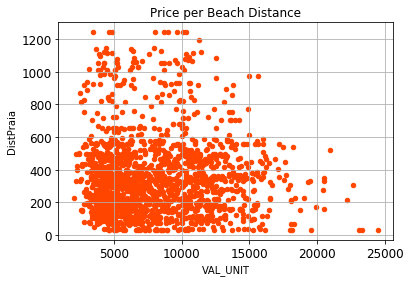

In [5]:
# Graph 'preço x distancia da praia'
copacabana.plot(kind='scatter',
                x='VAL_UNIT', 
                y='DistPraia', 
                title='Price per Beach Distance', 
                grid=True, 
                fontsize=12, 
                color='#ff4500')

plt.show()

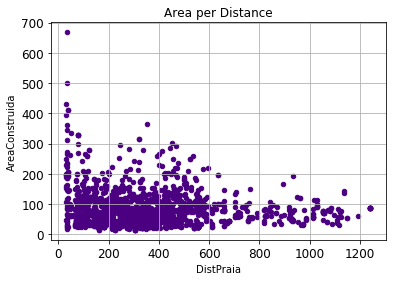

In [6]:
# Graph 'área construída x distancia da praia'
copacabana.plot(kind='scatter',
                x='DistPraia', 
                y='AreaConstruida', 
                title='Area per Distance', 
                grid=True, 
                fontsize=12,
                color='#4b0082')

plt.show()

##    Exercício 04. Construa histogramas para:
###    b) Copacabana: quartos

1.00    477
3.00    439
2.00    422
0.01    258
4.00     76
5.00      2
6.00      1
Name: Quartos, dtype: int64


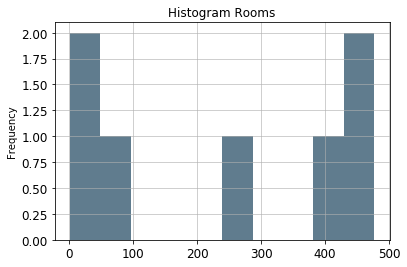

In [7]:
print(copacabana['Quartos'].value_counts())
copacabana['Quartos'].value_counts().plot(kind='hist', title='Histogram Rooms', fontsize=12, color='#607c8e')
plt.grid(axis='x', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.show()

##    Exercício 05. Construa diagramas de ramos e folhas para:
###    b) Copacabana: quartos

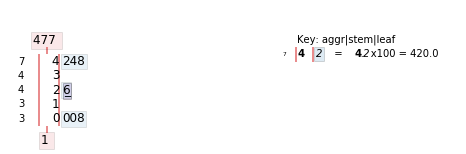

In [8]:
# pip install stemgraphic
graph = ste.stem_graphic(copacabana.groupby('Quartos').size())
plt.show(graph)

##    Exercício 06. Calcule a média aritmética para quartos no Copacabana.

In [9]:
copacabana['Quartos'].mean()

1.767510447761199

##    Exercício 07. Calcule a moda para quartos no Copacabana.

In [10]:
copacabana['Quartos'].mode()

0    1.0
dtype: float64

##    Exercício 08. Calcule a mediana para quartos no Copacabana.

In [11]:
copacabana['Quartos'].value_counts().median()

258.0

##    Exercício 09. Calcule as medidas de dispersão para quartos no Copacabana.

In [12]:
desc = dict(copacabana['Quartos'].describe())
list_copacabana = list(copacabana['Quartos'].value_counts())

total_amplitude, interquart_amplitude, list_dict, standard_deviation = (desc['max']-desc['min'], 
                                                                        desc['75%']-desc['25%'], 
                                                                        [desc['75%'],desc['25%']],
                                                                        desc['std'])                                     
semi_interq_ampl = (list_dict[0] - list_dict[1]) / (len(list_dict))
series_list = pd.Series(list_copacabana)
mean_deviation, variance_value, coef_variation = (series_list.mad(), 
                                                  st.variance(list_copacabana), 
                                                  (standard_deviation)/(st.mean(list_copacabana)))

df_result = pd.DataFrame([('Total Amplitude', total_amplitude),
                          ('Interquart. Ampli.', interquart_amplitude),
                          ('Semi-interquar. Ampl.', semi_interq_ampl),
                          ('Mean Deviation', mean_deviation),
                          ('Standard Deviation', standard_deviation),
                          ('Variance', variance_value),
                          ('Coefficient Variation', coef_variation)],
                         columns=['Dispersion Metric', 'Result'])
df_result

,Dispersion Metric,Result
0,Total Amplitude,5.990000
1,Interquart. Ampli.,2.000000
2,Semi-interquar. Ampl.,1.000000
3,Mean Deviation,182.530612
4,Standard Deviation,1.142523
5,Variance,44979.238095
6,Coefficient Variation,0.004775


##    Exercício 10. Determine e interprete as medidas de assimetria e curtose para quartos no Copacabana.

In [13]:
# medidas de assimetria
def getMode():
    list_mode = list(copacabana['Quartos'].mode())
    list_mode = list(copacabana[copacabana['Quartos'] == list_mode[0]]['Quartos'])
    return list_mode[0]

def getStandardDeviation():
    desc = dict(copacabana['Quartos'].describe())
    return desc['std']

mean_value = copacabana['Quartos'].mean()
mode_value = getMode()
stand_deviation = getStandardDeviation()
median_value = copacabana['Quartos'].value_counts().median()

coef_pearson = (mean_value - mode_value) / (stand_deviation)

if (coef_pearson == 0) or (mean_value == median_value and median_value == mode_value):
    print('A medida de assimetria é: simétrica! \nResultado: {}'.format(coef_pearson))
elif (coef_pearson < 0) or (mean_value <= median_value and median_value <= mode_value):
    print('A medida de assimetria é: Assimétrica negativa! \nResultado: {}'.format(coef_pearson))
elif (coef_pearson > 0) or (mean_value <= median_value and median_value <= mode_value):
    print('A medida de assimetria é: Assimétrica positiva! \nResultado: {}'.format(coef_pearson))

A medida de assimetria é: Assimétrica positiva! 
Resultado: 0.6717681916787785


In [14]:
# medidas de curtose
def getTotalAmplitude():
    desc = dict(copacabana['Quartos'].describe())
    q3 = desc['75%']
    q1 = desc['25%']
    return q3 - q1

total_amplitude = getTotalAmplitude()
p90 = np.percentile(list(copacabana['Quartos'].value_counts()), 90)
p10 = np.percentile(list(copacabana['Quartos'].value_counts()), 10)

k = (total_amplitude) / (2 * (p90 - p10))

if (k < 0.263):
    print('A distribuição referente ao grau de achatamento é Leptocúrtica! \nCurtose = {}'.format(k))
elif (k == 0.263):
    print('A distribuição referente ao grau de achatamento é Mesocúrtica! \nCurtose = {}'.format(k))
else:
    print('A distribuição referente ao grau de achatamento é Platicúrtica! \nCurtose = {}'.format(k))

A distribuição referente ao grau de achatamento é Leptocúrtica! 
Curtose = 0.002209456473707468


##    Exercício 11. Faça o gráfico Box Plot para quartos no Copacabana.

1.00    477
3.00    439
2.00    422
0.01    258
4.00     76
5.00      2
6.00      1
Name: Quartos, dtype: int64


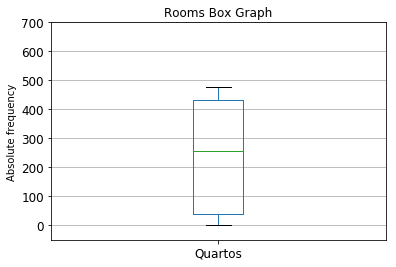

In [15]:
print(copacabana['Quartos'].value_counts())
copacabana['Quartos'].value_counts().plot(kind='box', title='Rooms Box Graph', fontsize=12)
plt.grid(axis='y')
plt.ylim(-50,700)
plt.ylabel('Absolute frequency')
plt.show()